In [1]:
import flask
from flask import jsonify
import geopandas as gpd
import geojsonio
from shapely.geometry import Point, Polygon
import json
from pprint import pprint
from matplotlib import pyplot as plt
import matplotlib as mpl
# %matplotlib inline

In [3]:
# mpl.rc('image', cmap='gray')
mpl.rc('figure', figsize = (15,15))

In [4]:
path = 'data/perm_AOI/perm_AOI.shp'
df_all = gpd.read_file(path)
path = 'data/changes/changes.shp'
df_target = gpd.read_file(path)

In [16]:
def read_poly(df, idx=2049):
    row = df[df.ORIG_FID == idx]
    poly = row.geometry
    return json.loads(poly.to_json())

In [20]:
json.loads(
    json.dumps({'map_fields' : read_poly(df_all, idx=1106),
            'map_ground_truth': read_poly(df_all, idx=1414),
           })
)

{'map_fields': {'type': 'FeatureCollection',
  'features': [{'id': '4843',
    'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[55.758283888841234, 56.737888654981816, 0.0],
       [55.758201916177526, 56.73788783844013, 0.0],
       [55.75820200047708, 56.737889000104104, 0.0],
       [55.75857899974971, 56.73806099993032, 0.0],
       [55.75872560496464, 56.73799499813027, 0.0],
       [55.758283888841234, 56.737888654981816, 0.0]]]},
    'bbox': [55.758201916177526,
     56.73788783844013,
     55.75872560496464,
     56.73806099993032]},
   {'id': '4844',
    'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[55.749727510089215, 56.73951640878688, 0.0],
       [55.74987399981918, 56.73922700036564, 0.0],
       [55.74948000001894, 56.73900300035758, 0.0],
       [55.749449000939315, 56.73878200045678, 0.0],
       [55.7490240000023, 56.73836900076412, 0.0],
       [55.74904900081792,

In [68]:
read_poly(df,1)

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[57.006923041786855, 56.134307607677954, 0.0],
      [57.006918009940485, 56.13430437704444, 0.0],
      [57.0069165755412, 56.13430887129559, 0.0],
      [57.009096685559335, 56.13571813851363, 0.0],
      [57.006923041786855, 56.134307607677954, 0.0]]]},
   'bbox': [57.0069165755412,
    56.13430437704444,
    57.009096685559335,
    56.13571813851363]}],
 'bbox': [57.0069165755412,
  56.13430437704444,
  57.009096685559335,
  56.13571813851363]}

In [20]:
s = set(df_all.ORIG_FID.values) & set(df_target.ORIG_FID.values)
s = list(s)
print(s)

[2563, 2564, 3593, 3596, 3597, 3601, 2578, 3602, 2580, 2585, 3609, 3610, 3614, 3113, 3118, 3133, 3134, 3154, 604, 3167, 3168, 3169, 3171, 613, 3173, 2181, 3206, 3207, 650, 3213, 655, 2705, 2706, 2707, 4757, 3230, 2719, 3233, 675, 3235, 1188, 1194, 1197, 2740, 2743, 2744, 3256, 2234, 2749, 2239, 2751, 2244, 2758, 2759, 3270, 3271, 1227, 3275, 4309, 3289, 2778, 3292, 1249, 1250, 3298, 2789, 1256, 2794, 1258, 3313, 1266, 3314, 3315, 2806, 2807, 4354, 2822, 4361, 2825, 2827, 2832, 3344, 2834, 3346, 3347, 2839, 1303, 1305, 1308, 4381, 1311, 1315, 2852, 1317, 1319, 1320, 1321, 1322, 2860, 3375, 1335, 1340, 1341, 2878, 3389, 2880, 1343, 2882, 1348, 3397, 1350, 1351, 2888, 2889, 2891, 3403, 1360, 1876, 1368, 1373, 3422, 1377, 2916, 1380, 2921, 1393, 1394, 1395, 1400, 1403, 2431, 2949, 2955, 3467, 1941, 2966, 2968, 3480, 1944, 1956, 1957, 2989, 3509, 3004, 3517, 1982, 3520, 3521, 1991, 1993, 3537, 3538, 3029, 3033, 3035, 3563, 3055, 3060, 3577]


In [6]:
def plot_many(l, **kwargs):
    for p in l:
        x,y = p.exterior.xy
        plt.fill(x,y, **kwargs)

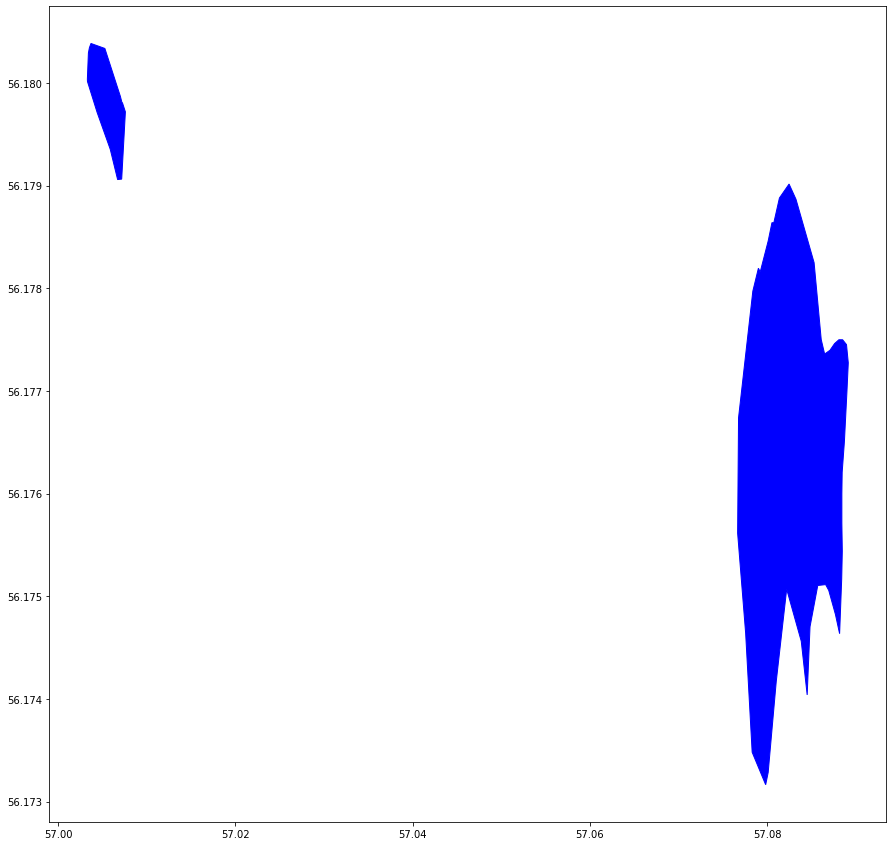

In [10]:
plot_many(df_all.loc[8:9].geometry, color='blue')
# plot_many(df_all.loc[20:30].geometry, color='red')

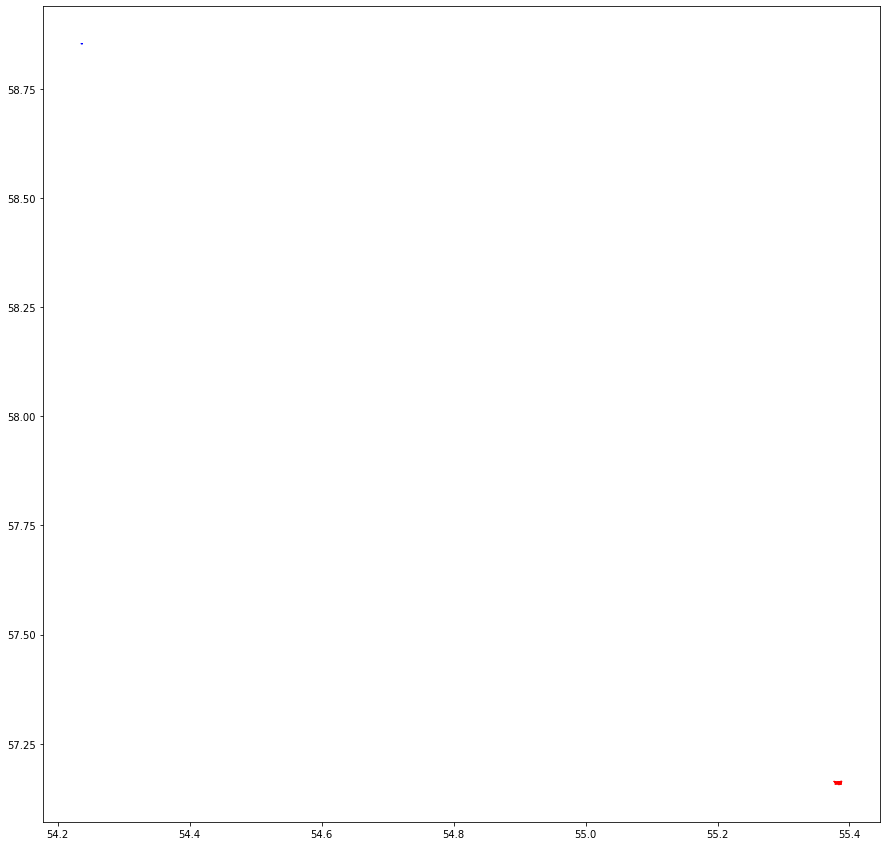

In [12]:
idx = 2966
fields = df_all[df_all.ORIG_FID == idx].geometry
targets = df_target[df_target.ORIG_FID == idx].geometry
plot_many(fields, color='blue')
plot_many(targets, color='red')

In [70]:
df_all.ORIG_FID.value_counts()
pfx

1141    1629
2901    1424
1642    1037
1414     626
1106     536
        ... 
1465       1
1449       1
3480       1
1417       1
2049       1
Name: ORIG_FID, Length: 4863, dtype: int64

In [58]:
path = 'data/fields/fields.shp'
df = gpd.read_file(path)
df

Empty GeoDataFrame
Columns: [ID, GRIDCODE, area, Shape_Leng, Shape_Area, geometry]
Index: []

In [59]:
path = 'data/changes/changes.shp'
df = gpd.read_file(path)
df

Id  ORIG_FID    Shape_Leng    Shape_Area          area2  \
0      0       604  2.247479e+03  7.939757e+04   21579.822452   
1      0       604  2.247479e+03  7.939757e+04   45818.976439   
2      0       613  2.759744e+04  2.245003e+06  397898.520648   
3      0       613  2.759744e+04  2.245003e+06   10337.119067   
4      0       650  2.996381e+04  3.881749e+06   60049.952412   
...   ..       ...           ...           ...            ...   
8256   0     18543  3.943298e+06  7.506543e+08   14121.788463   
8257   0     18543  3.943298e+06  7.506543e+08   28136.044511   
8258   0     18543  3.943298e+06  7.506543e+08  259081.164609   
8259   0     18543  3.943298e+06  7.506543e+08  389309.389397   
8260   0     18543  3.943298e+06  7.506543e+08   67562.123613   

                                               geometry  
0     POLYGON Z ((55.38166 56.74943 0.00000, 55.3813...  
1     POLYGON Z ((55.38327 56.75212 0.00000, 55.3833...  
2     MULTIPOLYGON Z (((55.47130 56.74659 0.00000, 5...  
3     POLYGON Z ((55.47460 56.75219 0.00000, 55.4746...  
4     POLYGON Z ((55.48926 56.75100 0.00000, 55.4899...  
...                                                 ...  
8256  POLYGON Z ((55.62997 57.38597 0.00000, 55.6302...  
8257  POLYGON Z ((55.62044 57.39169 0.00000, 55.6204...  
8258  POLYGON Z ((55.66200 57.39238 0.00000, 55.6620...  
8259  POLYGON Z ((55.62997 57.39408 0.00000, 55.6301...  
8260  POLYGON Z ((55.66744 57.39595 0.00000, 55.6660...  

[8261 rows x 6 columns]

In [41]:
geoms = df.geometry.copy()

In [ ]:
df['id_intersect'] = geoms.apply(
       lambda x: [i for i in range(len(geoms))
                     if x != geoms[i] and x.intersects(geoms[i])])

In [31]:
row = df[df.ORIG_FID == 2049].copy()

In [32]:
poly = row.geometry

In [33]:
poly.to_json()

'{"type": "FeatureCollection", "features": [{"id": "11459", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[368738.01159999985, 6453331.687899999, 0.0], [368891.1085000001, 6453276.573000001, 0.0], [368891.0641000001, 6453276.574200001, 0.0], [368735.94209999964, 6453331.687899999, 0.0], [368738.01159999985, 6453331.687899999, 0.0]]]}, "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}], "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}'

In [36]:
[poly.to_json()]

['{"type": "FeatureCollection", "features": [{"id": "11459", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[368738.01159999985, 6453331.687899999, 0.0], [368891.1085000001, 6453276.573000001, 0.0], [368891.0641000001, 6453276.574200001, 0.0], [368735.94209999964, 6453331.687899999, 0.0], [368738.01159999985, 6453331.687899999, 0.0]]]}, "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}], "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}']

In [17]:
df.ORIG_FID.value_counts()

1141    1629
2901    1424
1642    1037
1414     626
1106     536
        ... 
1465       1
1449       1
3480       1
1417       1
2049       1
Name: ORIG_FID, Length: 4863, dtype: int64


In [16]:
geojsonio.display(states)

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ObjectCode%22%3A%20%22738%22%2C%20%22ObjectID%22%3A%20%221%22%2C%20%22ObjectKey%22%3A%20%22S0000000738%22%2C%20%22ObjectName%22%3A%20%22102-%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%20%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%20%5Cufffd%5Cufffd%5Cufffd%22%2C%20%22SEM_1%22%3A%20%22%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Polygon%22%2C%20%22coordinates%22%3A%20%5B%5B%5B1314095.597953%2C%20479249.9877%5D%2C%20%5B1314093.127372%2C%20479246.572852%5D%2C%20%5B1314092.924004%2C%20479246.710366%5D%2C%20%5B1314091.519804%2C%20479244.897484%5D%2C%20%5B1314091.645699%2C%20479244.815169%5D%2C%20%5B1314089.263402%2C%20479241.721066%5D%2C%